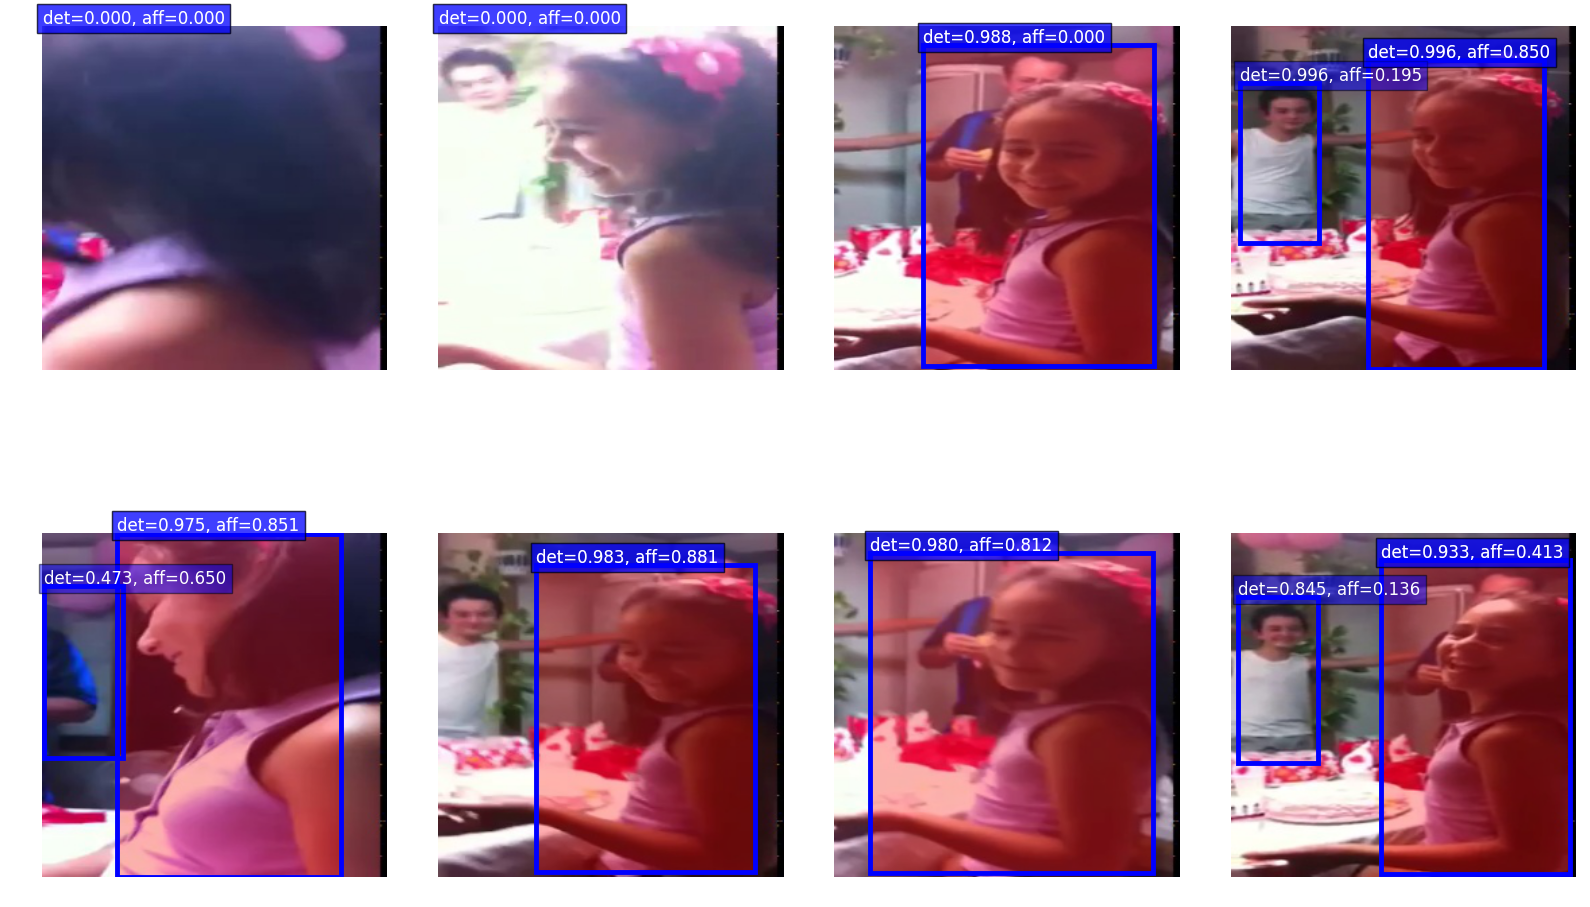

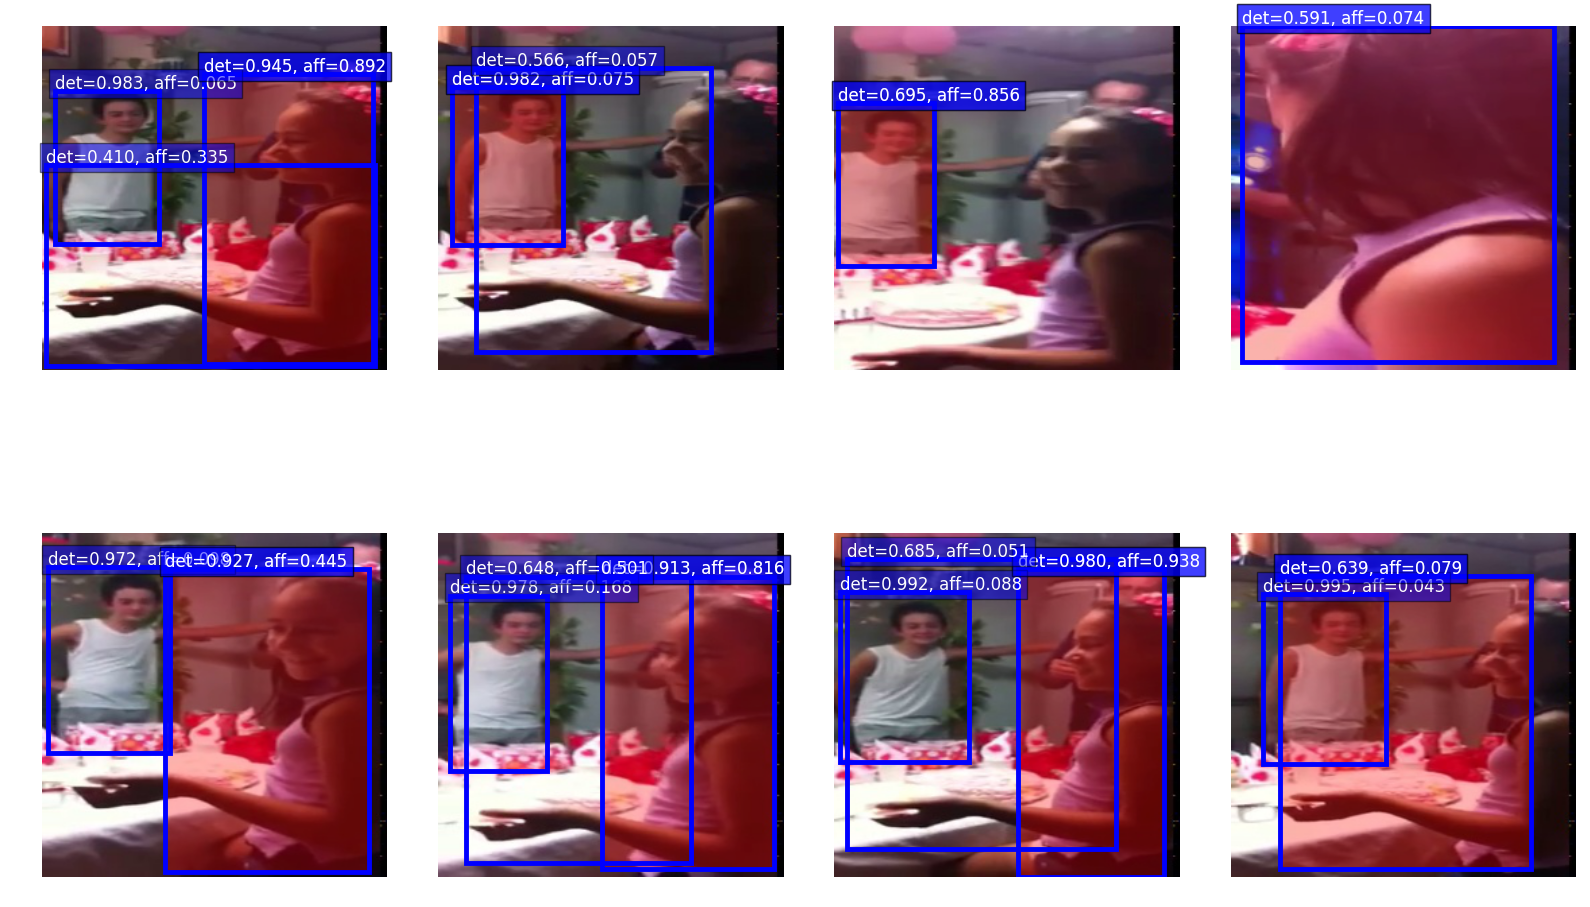

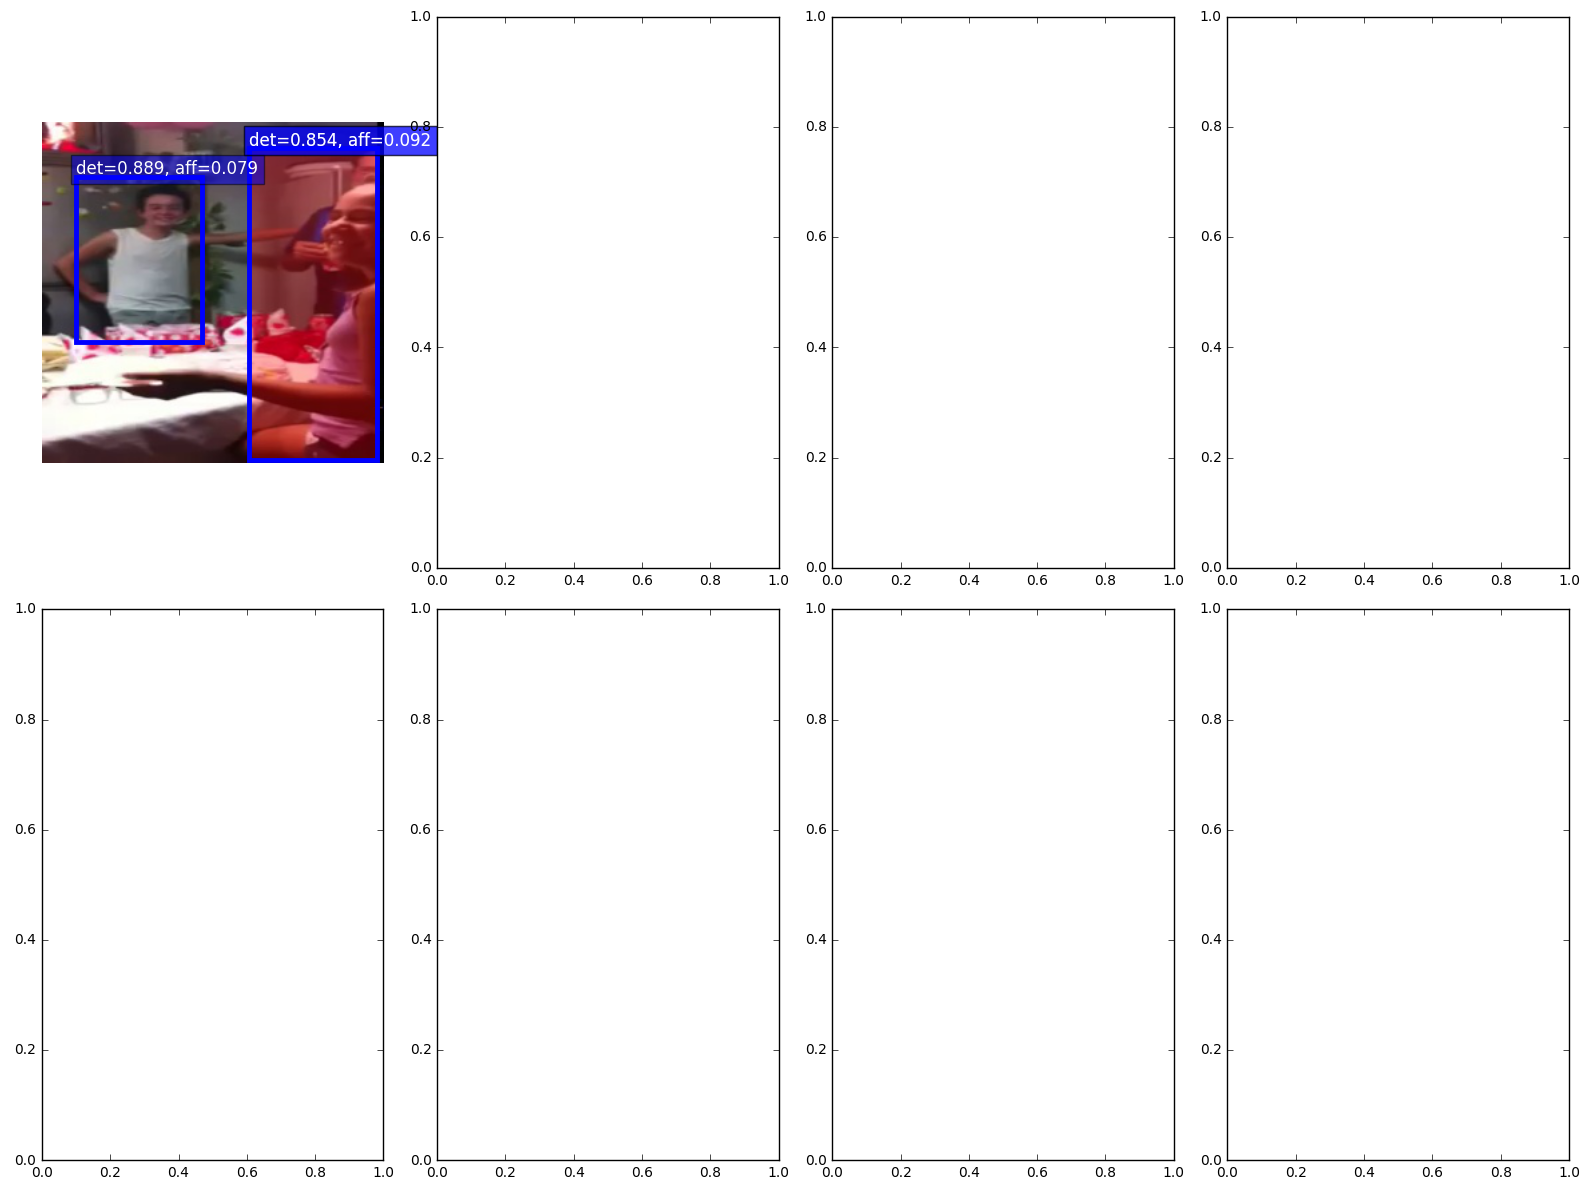

In [12]:
import pickle as pkl

import numpy as np
import matplotlib.pyplot as plt

from config import *
from util import load_video

def visualize_track(video, track, proposals):
#   import pdb; pdb.set_trace()
  rows, cols = 2, 4
  num_frames = rows*cols
  for i in range(int(np.ceil(len(video)/num_frames))):
    # import pdb; pdb.set_trace()
    fig, axarr = plt.subplots(rows, cols, figsize=(16, 12))
    fig.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99,
                wspace=0, hspace=0)
    for j in range(num_frames):
        t = i*num_frames + j
        if t >= len(video):
          break
        im = video[t]
        bbox = track[t][:4]
        score = track[t][4]
        affinity = track[t][5]
        x1, y1, x2, y2 = tuple(bbox)
       
        ax = axarr[int(j/cols)][j%cols]
        ax.set_axis_off()
        ax.imshow(im, aspect='equal')
        ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1,
            fill=True, color='red', alpha=0.3))
        ax.text(x1, y1 - 2,
            'det=%.3f, aff=%.3f' % (score, affinity),
            bbox=dict(facecolor='blue', alpha=0.5),
            fontsize=12, color='white')
                
#         bboxes = np.load(os.path.join(OUTPUT_ROOT, "track%d.npy"%t))
#         scores = np.load(os.path.join(OUTPUT_ROOT, "track%ds.npy"%t))
        
        bboxes = proposals[t][:, :4]
        scores = proposals[t][:, 4]
        affinities = proposals[t][:, 5]
        for k in range(len(bboxes)):
            bbox = bboxes[k]
            score = scores[k]
            affinity = affinities[k]
            x1, y1, x2, y2 = tuple(bbox)
            
            ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1,
                fill=False, edgecolor='blue', linewidth=3.5))
            ax.text(x1, y1 - 2,
                'det=%.3f, aff=%.3f' % (score, affinity),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=12, color='white')
    plt.tight_layout()
    plt.draw()

if __name__ == '__main__':
  videos = [load_video("AA8Besu7Qds=0")]
  with open(os.path.join(OUTPUT_ROOT, 'tracks'), 'rb') as f:
    tracks = pkl.load(f, encoding='latin1')
  with open(os.path.join(OUTPUT_ROOT, 'track_proposals'), 'rb') as f:
    track_proposals = pkl.load(f, encoding='latin1')

  plt.ion()
  for i in range(len(videos)):
    visualize_track(videos[i], tracks[i], track_proposals[i])
  plt.ioff()
  plt.show()
